# Etude de Cas Data Science - Arcane - Milhem François

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
train = pd.read_csv('/Users/francoismilhem/Desktop/Python/Arcane/train.csv', header=0)
test = pd.read_csv('/Users/francoismilhem/Desktop/Python/Arcane/test.csv', header=0)

Tout d'abord on s'imprègne du dataset en regarde sa forme

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


On regarde les informations du dataset afin de voir le type de data qui sont présentes ainsi que les valeurs manquantes

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

On fait de même pour le dataset de test

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

Pour commencer, regardons comment la varible cible est distribuée

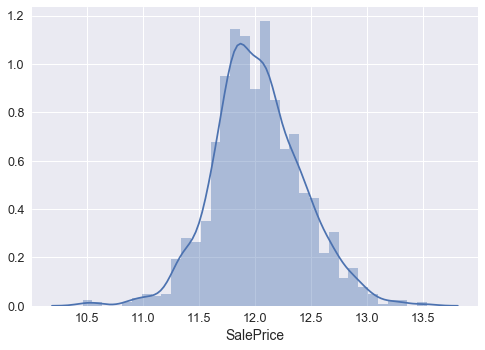

In [191]:

sns.distplot(train.SalePrice)

In [7]:
#Les prix de ventes ne sont pas bien réparties, et pour entraîner un modèle on préfére que leur distribution se
#rapproche d'une loi normale
train.SalePrice.skew()

1.8828757597682129

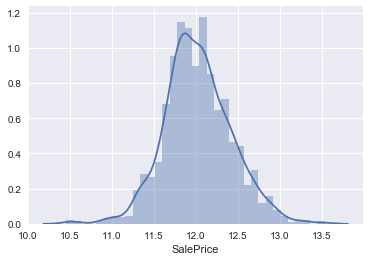

In [8]:
sns.distplot(train.SalePrice.apply(lambda x: math.log(x)))

In [9]:
train.SalePrice = train.SalePrice.apply(lambda x: math.log(x))

# TOUT D'ABORD, ON GÈRE LES DONNÉES MANQUANTES

Stratégie : 

- Alley : On va remplacer les NaN par des Strings "None"
- LotFrontage : On va remplacer les NaN par la moyenne des valeurs non nulles
- MasVnrTYpe : On remplaxce les Nan par des strings "None"
- MasVnrArea : Ici, j'ai fait le choix de remplacer les NaN par la médiane, en effet, beaucoup de ces valeurs sont égales à 0, il me semblait donc plus justifier de prendre la médiane.
- Basement : On remplaxce les Nan par des strings "None"
- Garage : On remplaxce les Nan par des strings "None"
- PoolQC : Toutes les valeurs absentes correspondent au cas où il n'y a pas de piscine, on remplace donc les NaN par des None
- FireplaceQu : Idem pour les FirePlace
- MiscFeature : On remplaxce les Nan par des strings "None"
- GarageYrBlt : Ici j'ai fait le choix de prendre la médiane


In [10]:
#Alley
train.Alley = train.Alley.fillna("None")
test.Alley = test.Alley.fillna("None")

In [11]:
#LotFrontage

train_lotfrontage_mean = train.LotFrontage[train.LotFrontage.isnull()==False].values.mean()
train.LotFrontage = train.LotFrontage.fillna(train_lotfrontage_mean)
test.LotFrontage = test.LotFrontage.fillna(train_lotfrontage_mean)

In [12]:
#MasVnrTYpe
#Replace the missing values with the most frequent one
train.MasVnrType = train.MasVnrType.fillna("None")
test.MasVnrType = test.MasVnrType.fillna("None")

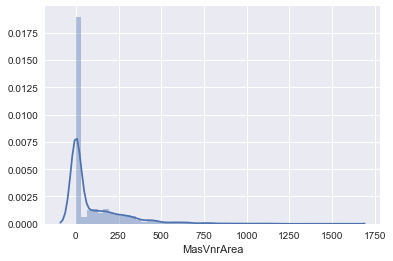

In [13]:
#MasVnrArea
sns.distplot(train.MasVnrArea[train.MasVnrArea.isnull()==False])

In [14]:
#MasVnrArea
train.MasVnrArea = train.MasVnrArea.fillna(train.MasVnrArea[train.MasVnrArea.isnull()==False].median())
test.MasVnrArea = test.MasVnrArea.fillna(train.MasVnrArea[train.MasVnrArea.isnull()==False].median())

In [15]:
#Basement

train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = \
      train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("None")
    
test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = \
      test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("None")

In [16]:
#Garage
train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = \
      train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna("None")
    
test[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = \
      test[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna("None")

In [17]:
#Electrical
train[['Electrical']] = train[['Electrical']].fillna(train[['Electrical']].count().index[0])
test[['Electrical']] = test[['Electrical']].fillna(train[['Electrical']].count().index[0])

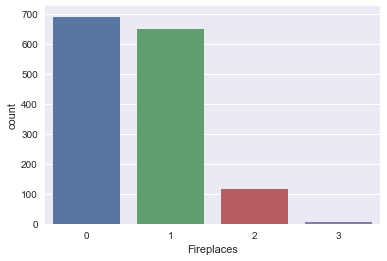

In [18]:
#FireplaceQu

sns.countplot(train.Fireplaces)

train.FireplaceQu = train.Fireplaces.fillna("None")
test.FireplaceQu = test.Fireplaces.fillna("None")

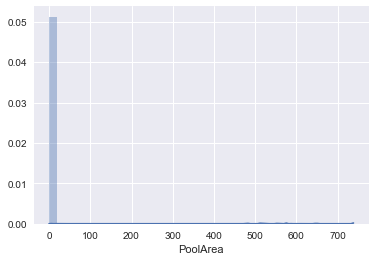

In [19]:
#PoolQC
#Here we have the same problem, NaN values in the PoolQC column mean that there is no Pool

sns.distplot(train.PoolArea)

train.PoolQC = train.PoolQC.fillna("None")
test.PoolQC = test.PoolQC.fillna("None")

In [20]:
#MiscFeature

train.MiscFeature = train.MiscFeature.fillna("None")
test.MiscFeature = test.MiscFeature.fillna("None")

In [21]:
#GarageYrBlt

train.GarageYrBlt = train.GarageYrBlt.fillna(train.GarageYrBlt[train.GarageYrBlt.isnull()==False].median())
test.GarageYrBlt = test.GarageYrBlt.fillna(train.GarageYrBlt[train.GarageYrBlt.isnull()==False].median())

In [22]:
#Fence

train.Fence = train.Fence.fillna("None")
test.Fence = test.Fence.fillna("None")

In [23]:
#KitchenQual

test.KitchenQual = test.KitchenQual.fillna(train['KitchenQual'].value_counts().index[0])

# Maintenant qu'il n'y a plus de valeurs manquantes, nous allons faire du preprocessing pour obtenir un dataset avec seulement des valeurs numériques

In [24]:
#Tout d'abord, débarassons nous des indices du train set qui ne sont d'aucune utilité.

train = train.drop(['Id'], axis = 1)

Avant de transformer les variables de type catégorie, analysons l'effet de certaines d'entre elles sur le prix de vente d'une maison.

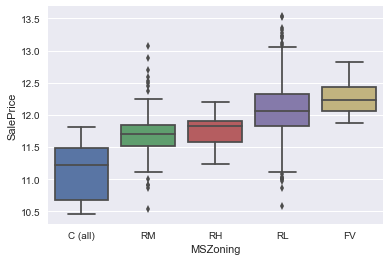

In [25]:
#Influence de MSZoning

ranks_mszoning = train.groupby("MSZoning")["SalePrice"].mean().fillna(0).sort_values().index
sns.boxplot(x=train.MSZoning, y=train.SalePrice, order=ranks_mszoning)


Conclusion sur la variable MSzoning : Ce n'est pas une surprise de voir que les maisons les plus chers ne sont pas dans les zones commerciales, mais qu'au contraire elles se situent dans les zones résidentielles

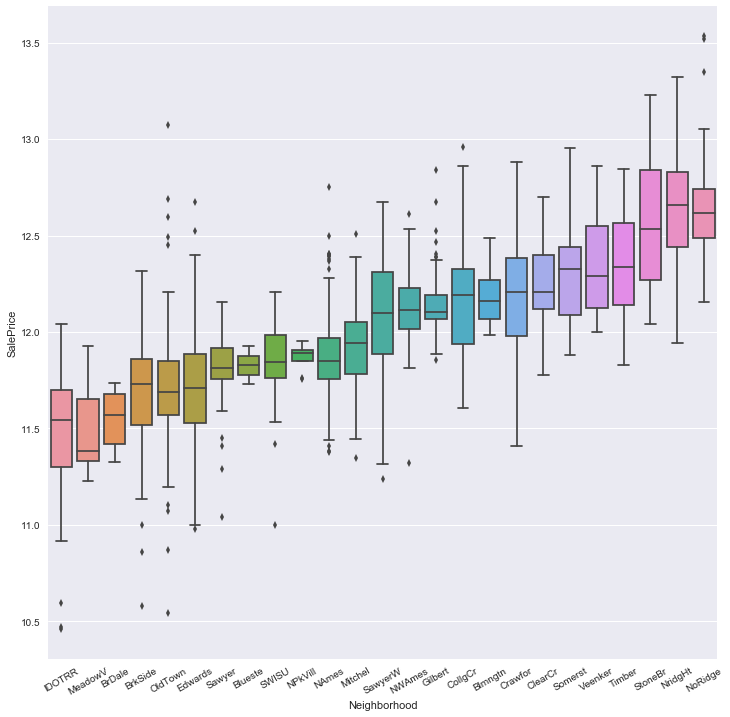

In [26]:
f, ax = plt.subplots(figsize=(12, 12))

ranks_neigh = train.groupby("Neighborhood")["SalePrice"].mean().sort_values().index
ax = sns.boxplot(x=train.Neighborhood, y=train.SalePrice,order=ranks_neigh)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

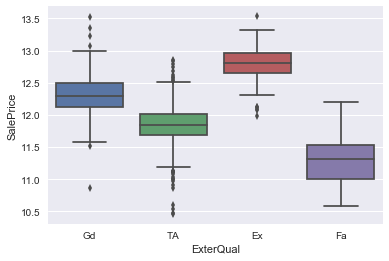

In [27]:
sns.boxplot(x=train.ExterQual, y=train.SalePrice)

Conclusion : Encore une fois le résultat n'est pas surprenant, plus la qualité des matériaux utilisés pour l'extérieur de la maison sont de bonnes qualités, plus la maison coutera chère.

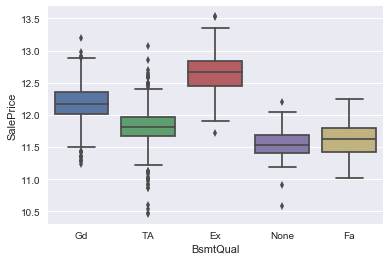

In [28]:
sns.boxplot(x=train.BsmtQual, y=train.SalePrice)

Conclusion : Ici, il est intéressant de découvrir que plus le sous sol a de la hauteur, plus la maison coûtera chère.

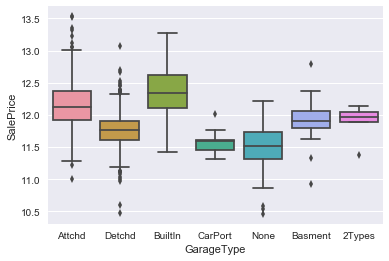

In [29]:
sns.boxplot(x=train.GarageType, y=train.SalePrice)

Conclusion : Une maison avec garage coûtera plus cher

On passe maintenant au preprocessing des data, notre stratégie sera la suivante : 

- On identifie les variables de catégories dîtes ordinales (c'est à dire qu'on peut établir une hierarchie entre celle-cis et nous allons créer des dictionnaires pour les mapper à des valeurs numériques en conservant cette notion de hierarchie.

- Pour les variables de catégories autres, nous allons tout simplement spliter les colonnes en autant de colonnes qu'il y a de possibles valeurs

In [30]:
#Mappons les variables suivantes à des valeurs numériques : 
#Pool, Garage Fireplace, Exter, Basement, Kitchen, Heating (Quality)

quality_dict = {
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA':3,
    'Gd':4,
    'Ex':5
}

train[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
        'GarageQual', 'GarageCond', 'PoolQC']] = train[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                    'GarageQual', 'GarageCond', 'PoolQC']].applymap(lambda x: quality_dict[x])

test[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
        'GarageQual', 'GarageCond', 'PoolQC']] = test[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                    'GarageQual', 'GarageCond', 'PoolQC']].applymap(lambda x: quality_dict[x])

In [31]:
#On fait de même ici pour LotShape

lotshape_quality = {
    'Reg':3,
    'IR1':2,
    'IR2':1,
    'IR3':3
}

train[['LotShape']] = train[['LotShape']].applymap(lambda x: lotshape_quality[x]) 
test[['LotShape']] = test[['LotShape']].applymap(lambda x: lotshape_quality[x]) 

In [32]:
#On fait de même ici pour Landslope

landslope_dict = {
    'Gtl':0,
    'Mod':1,
    'Sev':2
}

train[['LandSlope']] = train[['LandSlope']].applymap(lambda x: landslope_dict[x]) 
test[['LandSlope']] = test[['LandSlope']].applymap(lambda x: landslope_dict[x]) 

In [33]:
#On fait de même ici pour BsmtExposure

bsmt_exposure_ditc = {
    'None': 0,
    'No': 0,
    'Mn':1,
    'Av':2,
    'Gd':3
}

train[['BsmtExposure']] = train[['BsmtExposure']].applymap(lambda x: bsmt_exposure_ditc[x])
test[['BsmtExposure']] = test[['BsmtExposure']].applymap(lambda x: bsmt_exposure_ditc[x])

In [34]:
#On fait de même ici pour BsmtFinType1 & BsmtFinType2

bsmt_fin_type = {
    
    'None':0,
    'Unf':1,
    'LwQ':2,
    'Rec':3,
    'BLQ':4,
    'ALQ':5,
    'GLQ':6
}

train[['BsmtFinType1', 'BsmtFinType2']] = train[['BsmtFinType1', 'BsmtFinType2']].applymap(lambda x: bsmt_fin_type[x])
test[['BsmtFinType1', 'BsmtFinType2']] = test[['BsmtFinType1', 'BsmtFinType2']].applymap(lambda x: bsmt_fin_type[x])

In [35]:
#On fait de même ici pour CentralAir

yes_no_mapping = {
    'Y':1,
    'N':0
}

train[['CentralAir']] = train[['CentralAir']].applymap(lambda x: yes_no_mapping[x])
test[['CentralAir']] = test[['CentralAir']].applymap(lambda x: yes_no_mapping[x])

In [36]:
#On fait de même ici pour GarageFinish

garage_finish_mapping = {
    'None': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
}

train[['GarageFinish']] = train[['GarageFinish']].applymap(lambda x: garage_finish_mapping[x])
test[['GarageFinish']] = test[['GarageFinish']].applymap(lambda x: garage_finish_mapping[x])

In [37]:
#On fait de même ici pour Fence

fence_mapping = {
    'None':0,
    'MnWw':1,
    'GdWo':2,
    'MnPrv':3,
    'GdPrv':4
}

train[['Fence']] = train[['Fence']].applymap(lambda x: fence_mapping[x])
test[['Fence']] = test[['Fence']].applymap(lambda x: fence_mapping[x])

In [38]:
#On concatène maintenant les deux dataframes. En effet, on va spliter les colonnes avec des data de types catégories
#en plusieurs colonnes, et afin de conserver le même nombre de colonnes dans le train et test set, on les concatènes.
df = pd.concat((train.loc[:,:'SaleCondition'], test.loc[:, 'MSSubClass':]))

In [39]:
df =  pd.get_dummies(df)

In [40]:
#On s'assure de n'avoir aucun NaN en remplaçant ceux ci par la moyenne de la colonne

df = df.fillna(df.mean())

On va maintenant regarder l'effet de quelques variables numériques sur le prix de la maison

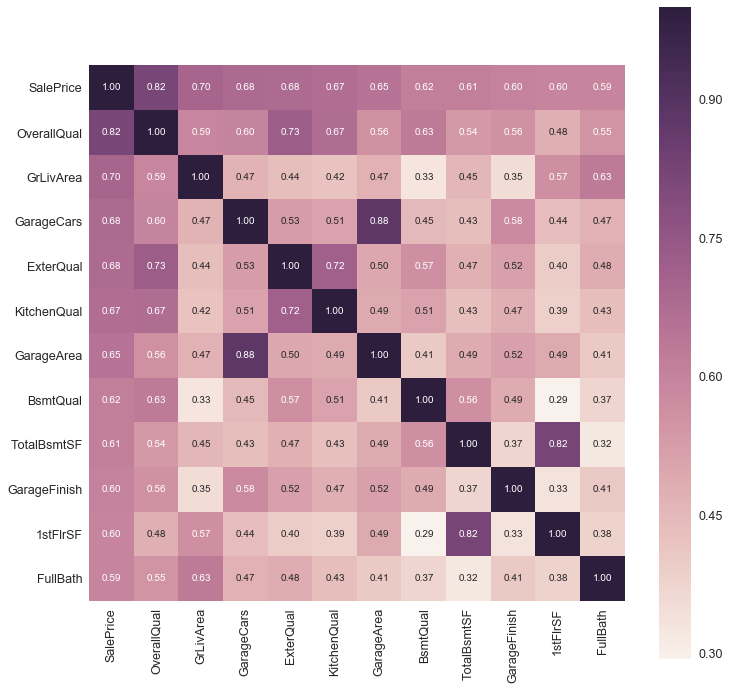

In [51]:
#On affiche une matrice de corrélation pour afficher les variables les plus corrélés linéairement au prix de vente.

f, ax = plt.subplots(figsize=(12, 12))

k = 12
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Quelques conclusions : 

- Nous ne sommes pas surpris de découvrir que plus la qualité globale des matériaux qui constituent la maison est élevée, plus le plus prix de la maison le sera.

- De même, plus la surface est grande, plus la maison coûtera chère.

- Une belle cuisine influe sur le prix de vente de façon positive.

- Plus le garage est grand, plus la maison sera chère.

- Plus la maison est récente, plus elle sera chère.







Regardons maitenant, quelles sont les variables qui sont le moins corrélées au prix de vente de la maison

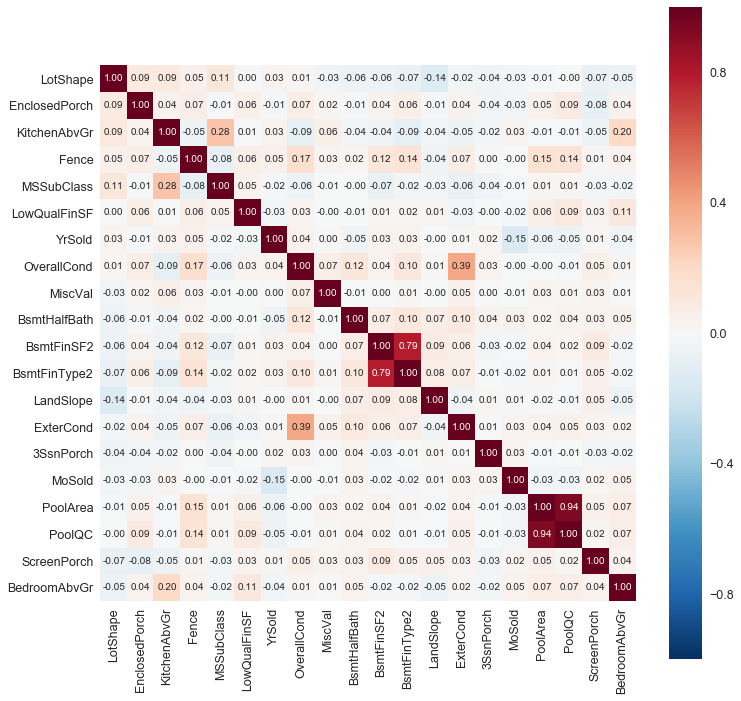

In [52]:
f, ax = plt.subplots(figsize=(12, 12))

k = 20
corrmat = train.corr()
cols_not_correlated = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols_not_correlated].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_not_correlated.values, xticklabels=cols_not_correlated.values)
plt.show()

Conclusion :
    
    
- On observe d'après la matrice de corrélation précédente que la variable PoolArea est très peu correlé au prix de vente. Ceci s'explique par le peu de maison avec piscine présentes dans le dataset. Vérifions que les maisons avec Piscine coûte néanmoins plus cher que la normale.

- De même pour la variable MiscVal : en effet, on peut imaginer que peu de biens disposent d'une MiscFeature, et donc cette variable influence très peu la prix de vente. Néanmoins, nous pouvons vérifier que si dans le cas où elle est non nulle, le prix de vente est à la hausse.

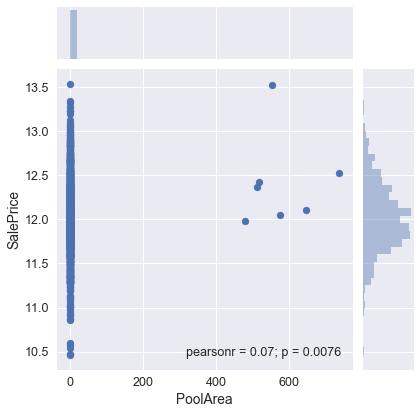

In [53]:
sns.jointplot(train.PoolArea, train.SalePrice)

On voit en effet que la présence d'une piscine tend a placer le prix de la maison parmis les valeurs hautes.

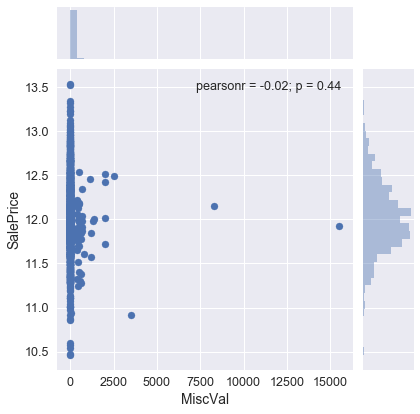

In [54]:
sns.jointplot(train.MiscVal, train.SalePrice)

L'hypothèse posée ne semble donc pas être bonne et la variable MiscVal ne semble pas vraiment influer sur le prix de vente.





Observons maintenant graphiquement les variables les plus corrélées au prix de vente 

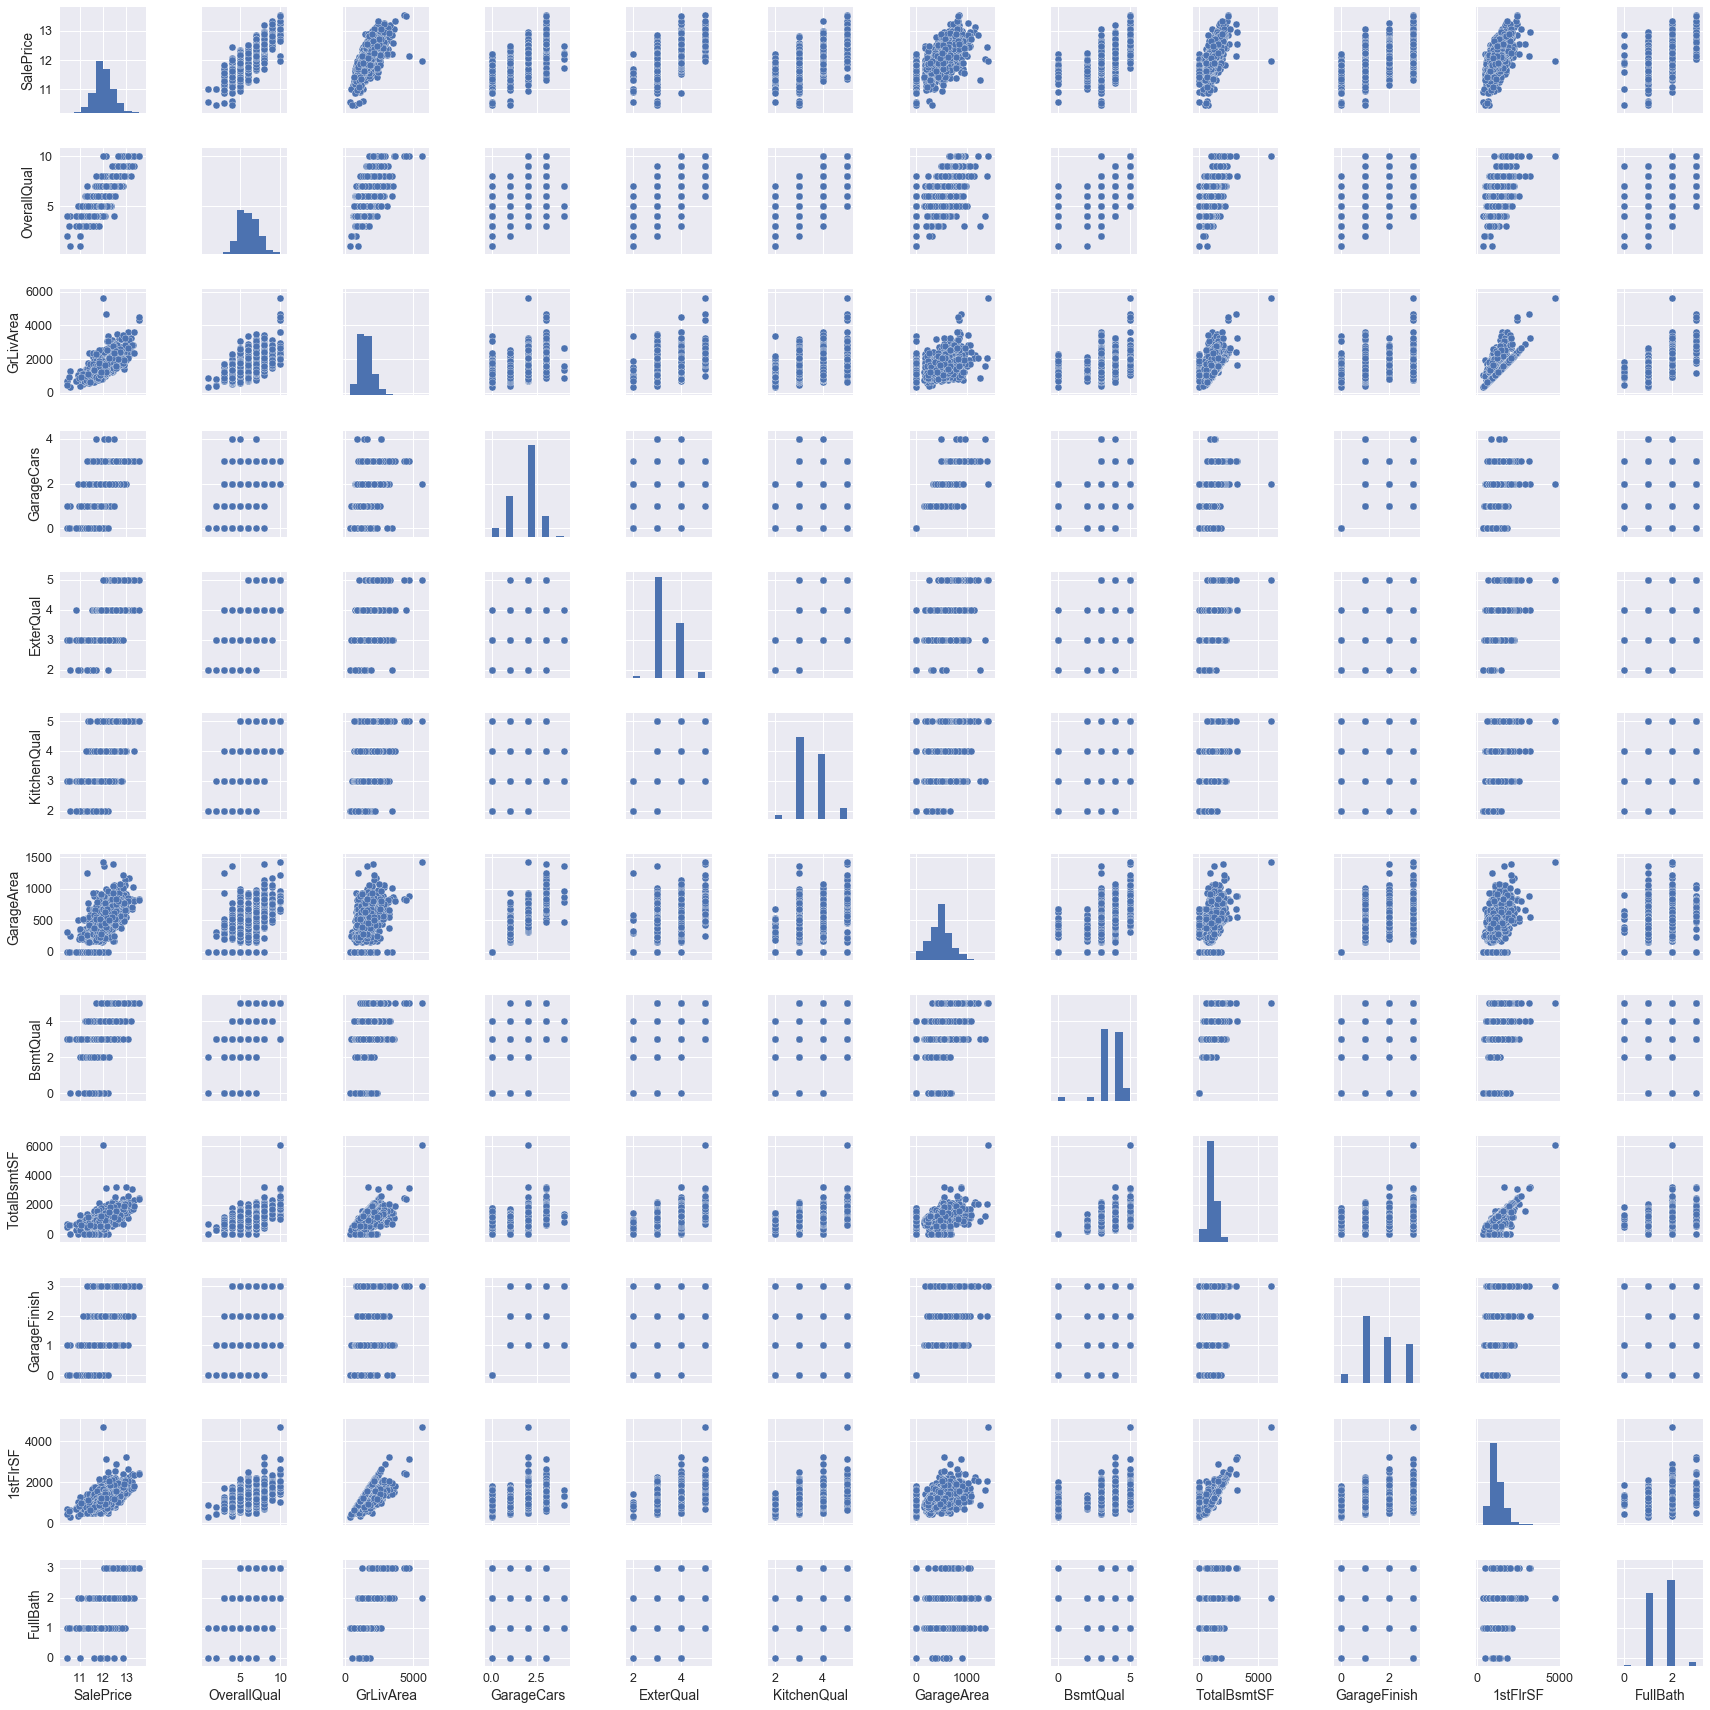

In [55]:
sns.pairplot(train[cols], size=2)
plt.tight_layout()
plt.show()

Conclusion : On voit clairement des relations apparaîtrent entre le prix de vente et ces variables

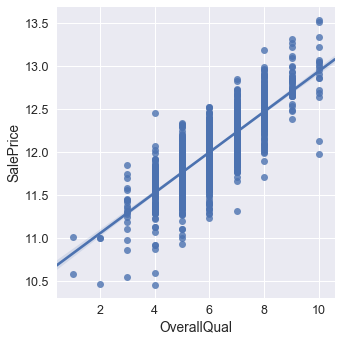

In [175]:
sns.lmplot(x='OverallQual', y='SalePrice', data=train)

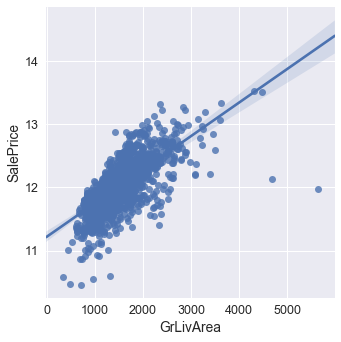

In [176]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=train)

# Prédiction du prix de vente

In [56]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[:train.shape[0]].values
y = train['SalePrice']

#On préfére travailler avec des données normalisées
std = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

X_final_test_std = std.transform(df[train.shape[0]:])

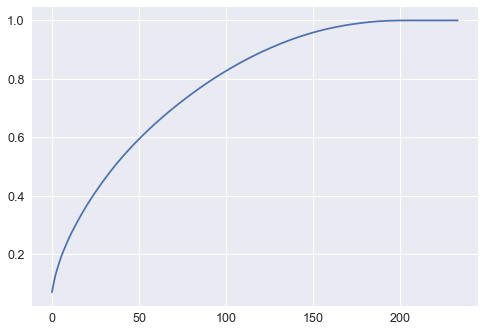

In [57]:
#Regarder la variance expliquée
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train_std)

total = sum(pca.explained_variance_)
explained_variance = [(i/total) for i in pca.explained_variance_]
cum_sum_explained_variance = np.cumsum(explained_variance)


plt.plot(range(len(explained_variance)), cum_sum_explained_variance)

In [58]:
pca = PCA(n_components=180)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_test_final_pca = pca.transform(X_final_test_std)

J'ai essayé de diminuer les dimensions du datasets grace à une ACP, mais les résultats finaux étaient moins bons.

In [127]:
resultats = dict()
algo = list()

In [155]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid_lasso_ridge = {
    'alpha': alpha_range
}

lasso = Lasso(random_state=0)

gs_lasso = GridSearchCV(estimator=lasso,
                     param_grid=param_grid_lasso_ridge,
                     scoring='neg_mean_squared_error',
                     cv=100,
                     n_jobs=1)

gs_lasso.fit(X_train_std, y_train)


GridSearchCV(cv=100, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [156]:
print('RMSE: %.3f' %(np.sqrt(mean_squared_error(y_train, gs_lasso.predict(X_train_std)))))
print('R2: %.3f' %(r2_score(y_train, gs_lasso.predict(X_train_std))))

RMSE: 0.117
R2: 0.916


In [130]:
algo.append('Lasso')
resultats['Lasso'] = np.sqrt(mean_squared_error(y_train, gs_lasso.predict(X_train_std)))

In [157]:
ridge = Ridge(random_state=0)

gs_ridge = GridSearchCV(estimator=ridge,
                     param_grid=param_grid_lasso_ridge,
                     scoring='neg_mean_squared_error',
                     cv=100,
                     n_jobs=1)

gs_ridge.fit(X_train_std, y_train)

GridSearchCV(cv=100, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [158]:
print('RMSE: %.3f' %(np.sqrt(mean_squared_error(y_train, gs_ridge.predict(X_train_std)))))
print('R2: %.3f' %(r2_score(y_train, gs_ridge.predict(X_train_std))))

RMSE: 0.116
R2: 0.916


In [159]:
algo.append('Ridge')
resultats['Ridge'] = np.sqrt(mean_squared_error(y_train, gs_ridge.predict(X_train_std)))

In [160]:
from sklearn.linear_model import ElasticNet

l1_ratio = [x * 0.10 for x in range(5, 10)]

param_grid = {
    'l1_ratio':l1_ratio,
    'alpha':alpha_range
}

elastic = ElasticNet(random_state=0)

gs_elastic = GridSearchCV(estimator=elastic,
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                     cv=100,
                     n_jobs=1)

gs_elastic.fit(X_train_std, y_train)

GridSearchCV(cv=100, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'l1_ratio': [0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9], 'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [161]:
print('RMSE: %.3f' %(np.sqrt(mean_squared_error(y_train, gs_elastic.predict(X_train_std)))))
print('R2: %.3f' %(r2_score(y_train, gs_elastic.predict(X_train_std))))

RMSE: 0.107
R2: 0.929


In [162]:
algo.append('ElasticNet')
resultats['ElasticNet'] = np.sqrt(mean_squared_error(y_train, gs_elastic.predict(X_train_std)))

In [163]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)

tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [164]:
print('RMSE: %.3f' %(np.sqrt(mean_squared_error(y_train, tree.predict(X_train)))))
print('R2: %.3f' %(r2_score(y_train, tree.predict(X_train))))

RMSE: 0.186
R2: 0.786


In [165]:
algo.append('Tree')
resultats['Tree'] = np.sqrt(mean_squared_error(y_train, tree.predict(X_train)))

In [166]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                               max_depth=5,
                               criterion='mse',
                              random_state=0,
                              n_jobs=-1)

forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [167]:
print('RMSE: %.3f' %(np.sqrt(mean_squared_error(y_train, forest.predict(X_train)))))
print('R2: %.3f' %(r2_score(y_train, forest.predict(X_train))))

RMSE: 0.128
R2: 0.898


In [168]:
algo.append('Forest')
resultats['Forest'] = np.sqrt(mean_squared_error(y_train, forest.predict(X_train)))

In [169]:
res = pd.DataFrame({
    'Model': algo,
    'Score': [resultats[val] for a, val in enumerate(algo)]
}
)
res.sort_values(by='Score', ascending=True)

,Model,Score
2,ElasticNet,0.107144
6,ElasticNet,0.107144
1,Ridge,0.116378
5,Ridge,0.116378
0,Lasso,0.116821
4,Forest,0.128252
8,Forest,0.128252
3,Tree,0.186350
7,Tree,0.186350


Le modèle qui renvoie les meilleurs résultats parmi ceux que j'ai essayé est donc l'algorithme "ElasticNet" qui est un mix du Ridge et Lasso.

Afin de vérifier que le modèle est bon, regardons s'il ne souffre pas de sur apprentissage sur le petit set de Test que j'ai crée à partir du training set.

In [170]:
print('RMSE pour ElasticNet : %.3f ' %mean_squared_error(y_test,gs_elastic.predict(X_test_std)))

RMSE pour ElasticNet : 0.013 


Le modèle ne semble pas souffrir de sur apprentissage

Visualisons les résidus du modèle ElasticNet pour le training ainsi que le test set 

(10, 14)

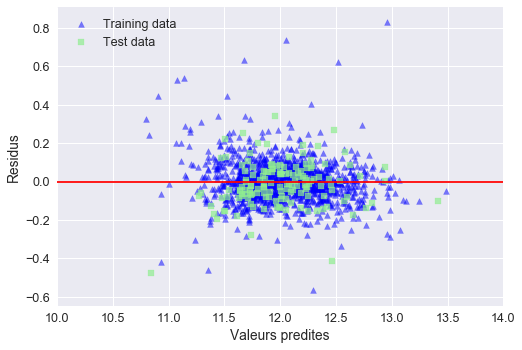

In [190]:
plt.scatter(gs_elastic.predict(X_train_std),  
            gs_elastic.predict(X_train_std) - y_train, 
            c='blue', 
            marker='^', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(gs_elastic.predict(X_test_std),  
            gs_elastic.predict(X_test_std) - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Valeurs predites')
plt.ylabel('Residus')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=14, color='red')
plt.xlim([10, 14])


In [171]:
final = (np.exp(gs_elastic.predict(X_final_test_std)))

In [172]:
pd.DataFrame({'Id': test.Id, 'SalePrice': final}).to_csv('2017-11-03.csv', index =False)    


Possibles améliorations pour obtenir un meilleur RMSE : regarder quelles sont les données qui comme le prix de vente ont une déviation par rapport à la moyenne et par exemple prendre le log également pour se rapprocher d'une loi normale.